# <center> TP N°3 </center>
### <center> Interpolation Polynômiale (Lagrange, Phénomène de Runge)

</center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 SI GR02 </center>
    <center> 20/10/2020 </center>
</div>

## 1. Interpolation de Lagrange

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Déﬁnir un nombre de points N 
N = 2

# Bornes 
a = -np.pi
b = np.pi

# Créer une discrétisation 
x = np.linspace(a,b, N+1)
print("x : ", x)

# Créer un vecteur (yi) contenant les composantes de f(x) = sin(x)
y = []
for i in range(N+1):
    y.append(np.sin(x[i]))
print("\ny : ", y)

x :  [-3.14159265  0.          3.14159265]

y :  [-1.2246467991473532e-16, 0.0, 1.2246467991473532e-16]


In [2]:
# Interpolation de Lagrange 
def Lagrange(Xs, x_pt, y_pt):
    N = len(x_pt)
    yL = []
    
    for x in Xs:
        y = 0
        for i in range(N):
            Li = 1
            for k in range(N):
                if k != i:
                    Li *= (x - x_pt[k])/(x_pt[i] - x_pt[k])
                    if x_pt[i] == x_pt[k]:
                        print("x_pt[%]",i,x_pt[i],"x_pt[%]",k,x_pt[k])
            y += y_pt[i] * Li
        yL.append(y)
    return yL

In [3]:
Xs = np.linspace(a, b, 100)
P = Lagrange(Xs, x, y )


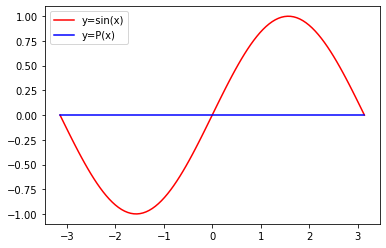

In [4]:
xsin = np.linspace(a, b, 100)
# ax = plt.subplots(1, 2, figsize=(10, 5))
plt.plot(xsin, np.sin(xsin), '-r', label='y=sin(x)')
plt.plot(Xs, P, '-b', label='y=P(x)')
plt.legend()

In [5]:
def interpolation_graph(N, a, b):
    x = np.linspace(a, b, 100)
    x_pt = np.linspace(a, b, N+1)
    y_pt = np.sin(x_pt)

    P = Lagrange(x, x_pt, y_pt )

    plt.plot(x, np.sin(x), '-r', label='y=sin(x)')
    plt.plot(x, P, '-b', label='y=P(x)')
    plt.title('N = ' + str(N + 1))
    plt.legend()

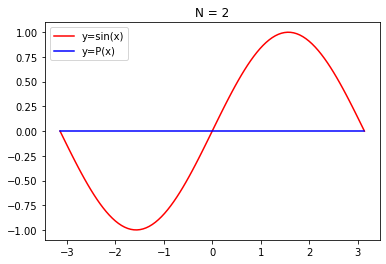

In [6]:
interpolation_graph(1, a, b)

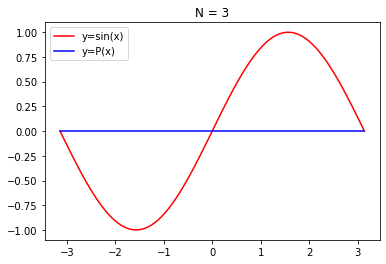

In [7]:
interpolation_graph(2, a, b)

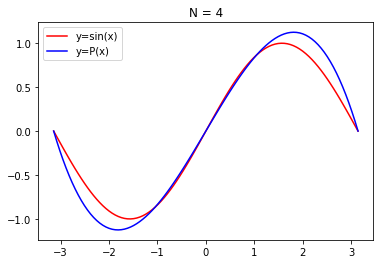

In [8]:
interpolation_graph(3, a, b)

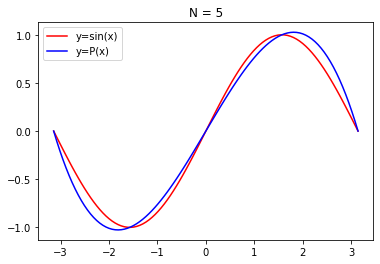

In [9]:
interpolation_graph(4, a, b)

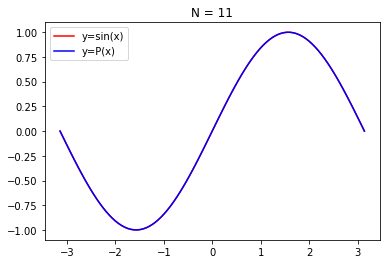

In [10]:
interpolation_graph(10, a, b)

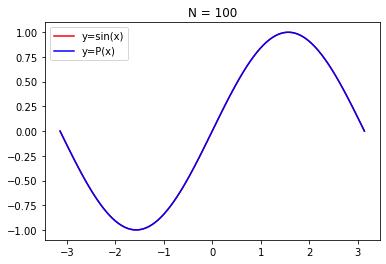

In [11]:
interpolation_graph(99, a, b)

> On constate qu'en augmentant le nombre de points d'interpolation, l'interpolée de $sin()$ ressemble de plus en plus à la fonction $sin()$ elle-même. Cependant, 4 points suffisent pour avoir une bonne approximation de la fonction $sin()$ sur $[-1;1]$

## 2. Phénomène de Runge 

In [12]:
def interpolation_Runge(N, a, b):
    def f1(x):
        return (1/(1+x**2))
    f = np.vectorize(f1)
    x = np.linspace( a, b, 100)
    x_pt = np.linspace( a, b, N+1)

    P = Lagrange(x, x_pt, f(x_pt))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(x, f(x), '-r', label='y= 1/(1+x^2) ')
    ax2.plot(x, P, '-b', label='y=P(x)')
    plt.title('N = ' + str(N + 1))
    fig.legend()

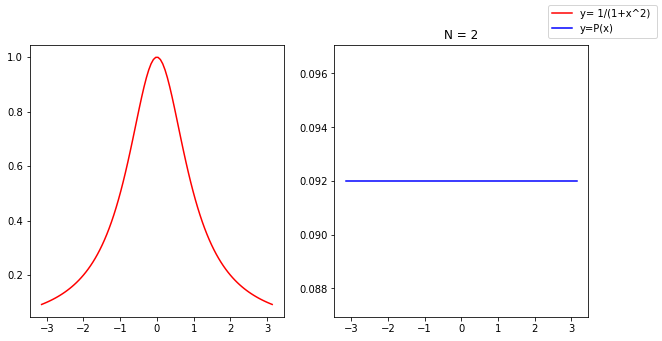

In [13]:
interpolation_Runge(1, a, b)

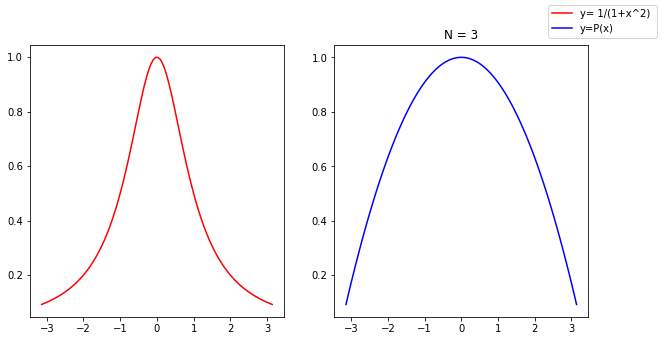

In [14]:
interpolation_Runge(2, a, b)

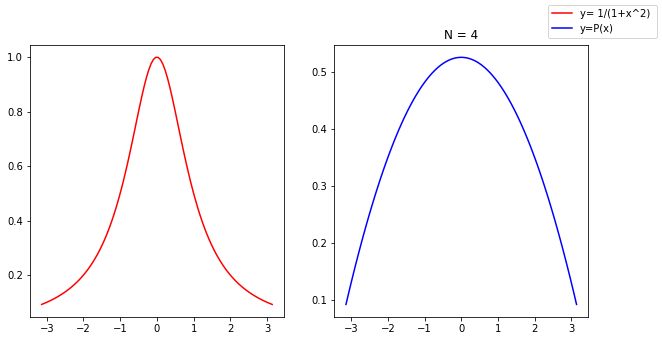

In [15]:
interpolation_Runge(3, a, b)

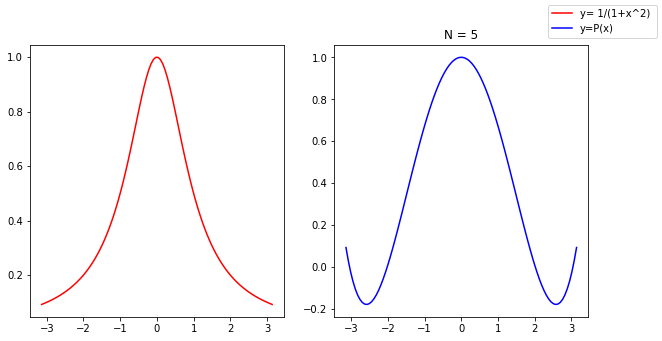

In [16]:
interpolation_Runge(4, a, b)

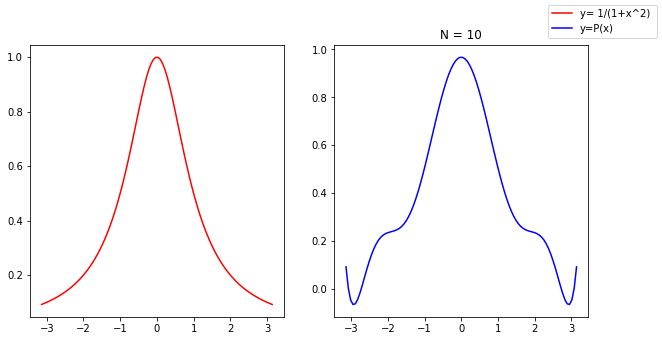

In [17]:
interpolation_Runge(9, a, b)

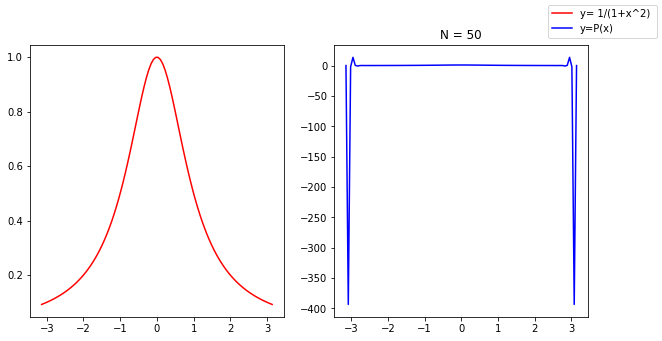

In [18]:
interpolation_Runge(49, a, b)

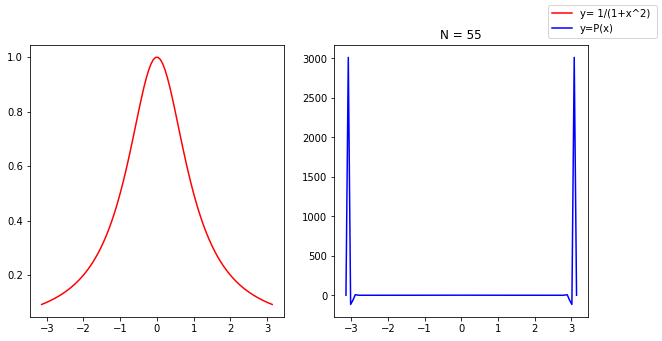

In [19]:
interpolation_Runge(54, a, b)

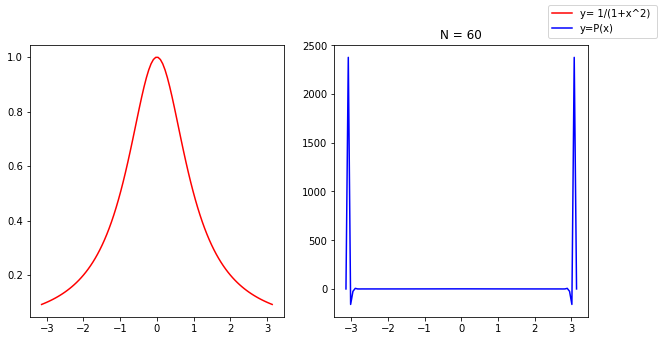

In [20]:
interpolation_Runge(59, a, b)

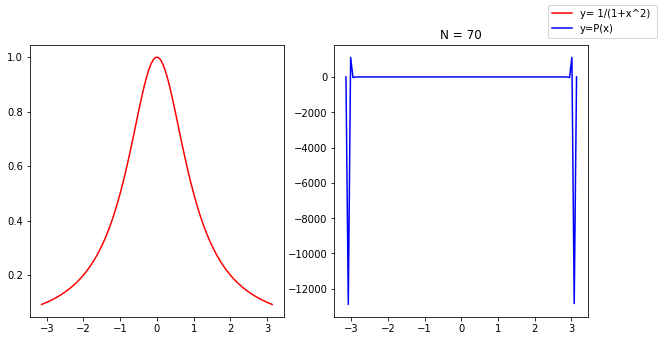

In [21]:
interpolation_Runge(69, a, b)

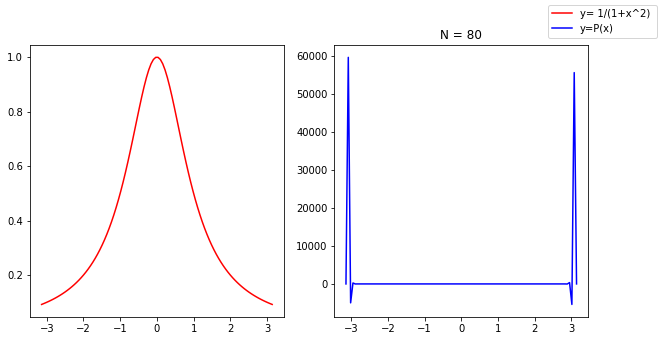

In [22]:
interpolation_Runge(79, a, b)

> Ici, on constate qu'à partir d'un certain nombre de points d'interpolation (environ 50), l'augmentation du nombre de points $n$ détériore l'approximation de la fonction donnée au lieu de l'améliorer.

## 3. Interpolation par les points de tchebychev 

In [23]:
def interpolation_tchebychev(N, a, b):
    def f1(x):
        return (1/(1+x**2))
    f = np.vectorize(f1)
    
    x = np.linspace( a, b, 100)
    
    x_tcheb = np.zeros((N,))
    for i in range(x_tcheb.shape[0]):
        x_tcheb[i] = np.cos((2*i+1)*np.pi/(2*N))

    P = Lagrange(x, x_tcheb, f(x_tcheb))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(x, f(x), '-r', label='y= 1/(1+x^2) ')
    ax2.plot(x, P, '-b', label='y=P(x)')
    plt.title('N = ' + str(N))
    fig.legend()
    
a, b = -1, 1

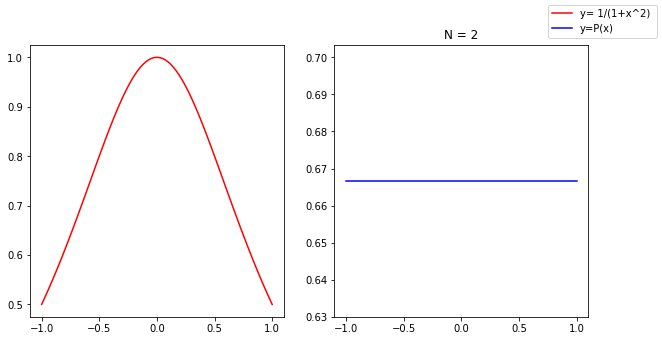

In [24]:
interpolation_tchebychev(2, a, b)

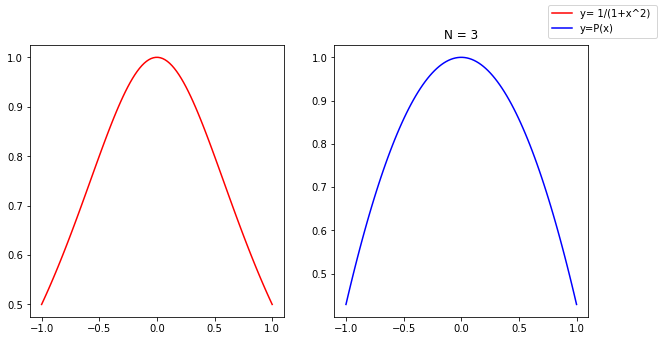

In [25]:
interpolation_tchebychev(3, a, b)

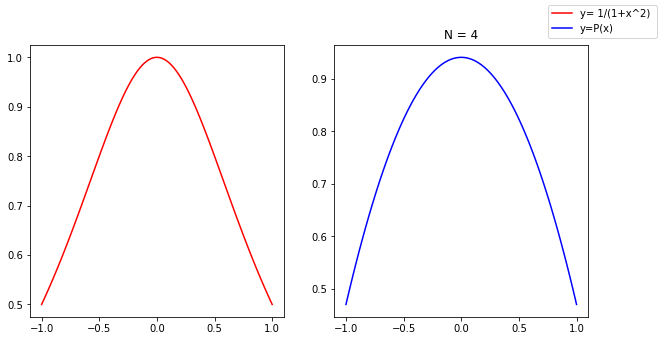

In [26]:
interpolation_tchebychev(4, a, b)

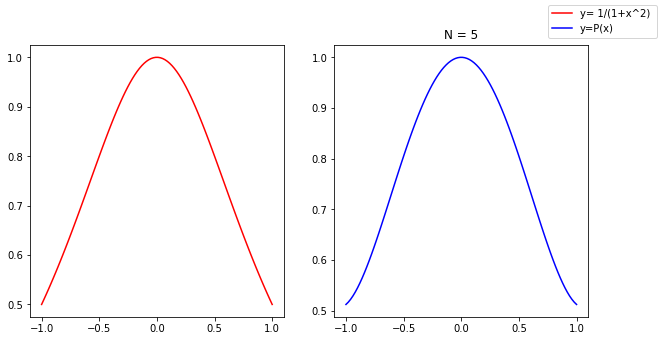

In [27]:
interpolation_tchebychev(5, a, b)

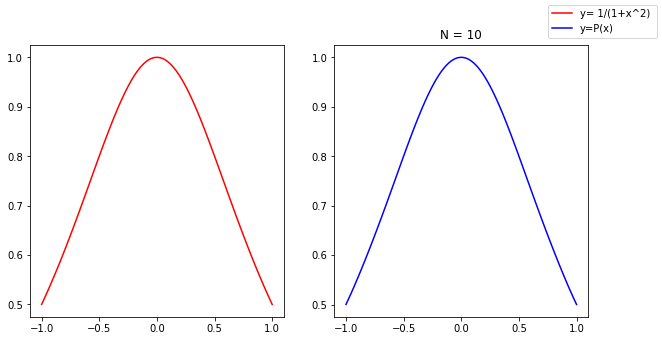

In [28]:
interpolation_tchebychev(10, a, b)

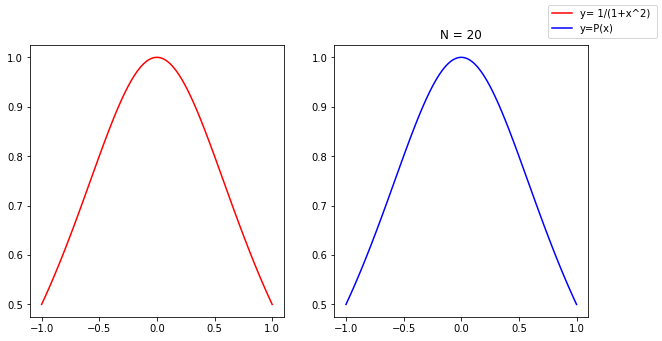

In [29]:
interpolation_tchebychev(20, a, b)

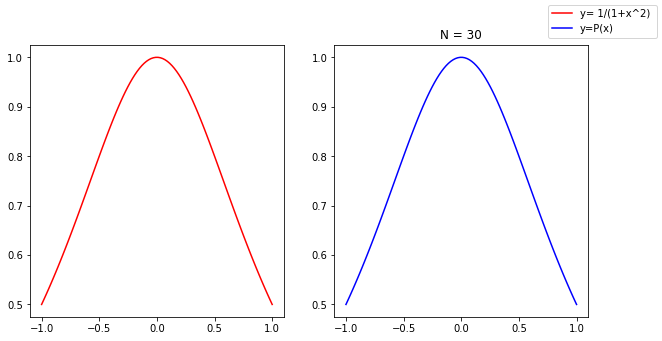

In [30]:
interpolation_tchebychev(30, a, b)

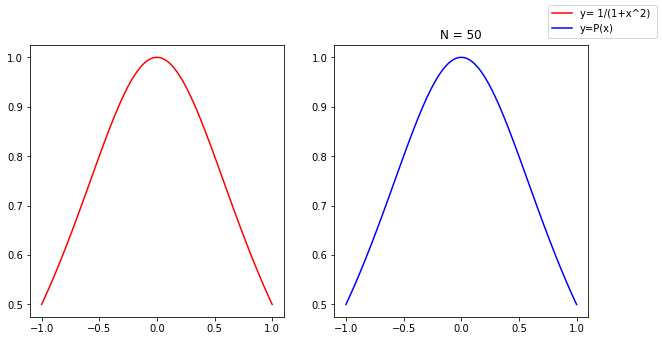

In [31]:
interpolation_tchebychev(50, a, b)

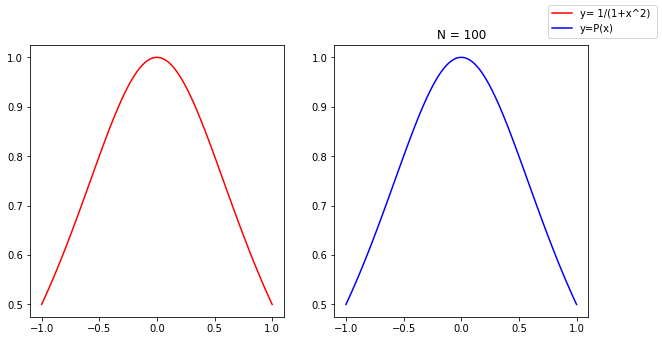

In [32]:
interpolation_tchebychev(100, a, b)

> On remarque qu'en augmentant le nombre de points de tchebychev, l'interpolée de $f$ devient de plus en plus semblable à $f$, alors qu'on était sur une fonction sujet au phénomène de Runge. L'utilisation des points de Tchebychev permet donc d'éviter le phénomène de Runge.